Calculations from the experimental data, retrieved from the CBP article using WebplotDigitizer.

# M5 time course

In [1]:
import pandas as pd
from utils.unit_conversion import g_per_L_to_mmol

m5_data = pd.read_csv('exp_data/m5.csv')

In [2]:
m5_data.head()

,time,g/L,metabolite
0,0.000000,-0.004233,acetate
1,24.019509,0.722645,acetate
2,48.031350,1.652565,acetate
3,71.909392,3.699241,acetate
4,96.119819,4.261136,acetate


In [12]:
# remove negative values since they are errors from the read-in of data
m5_data = m5_data.applymap(lambda x: 0 if isinstance(x, float) and x < 0 else x)

# get row for mmol
m5_data['mmol'] = m5_data.apply(lambda row: g_per_L_to_mmol(row['metabolite'], row['g/L']), axis=1)

<AxesSubplot: xlabel='time', ylabel='mmol'>

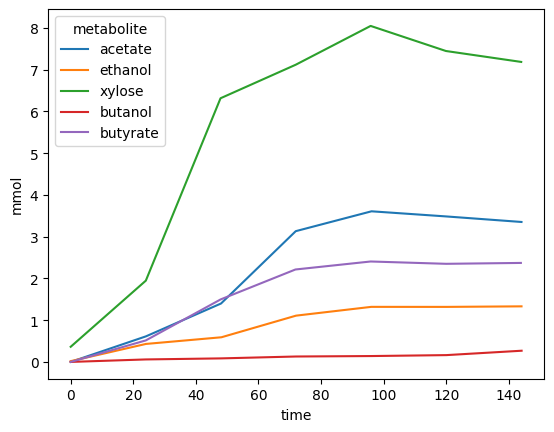

In [43]:
import seaborn as sns

sns.lineplot(data=m5_data, x='time', y='mmol', hue='metabolite')

In [49]:
final_amount = {}
for met in m5_data["metabolite"].unique():
    n = m5_data[m5_data["metabolite"] == met]["mmol"].iloc[-1]
    final_amount[met] = n

In [54]:
final_amount['butyrate'] / final_amount['acetate']

0.707346586712461

- If I make the simplifying assumption of equal production throughout, then it is possible to add in constraints of met x produced in relation to met y
- Since I have numbers for the substrate amount that is added and the amount that is left, yield constraints can also be added
- this can also be used in the acidogenic phase of nj4, BUT NOT SOLVENTOGENIC (for obvious reasons)

# NJ4 time course

In [1]:
import pandas as pd
from utils.unit_conversion import g_per_L_to_mmol

nj4_data = pd.read_csv('exp_data/nj4.csv')

In [2]:
from utils.data_processing import remove_neg_vals

remove_neg_vals(nj4_data, inplace=True)

# get row for mmol
nj4_data['mmol'] = nj4_data.apply(lambda row: g_per_L_to_mmol(row['metabolite'], row['g/L']), axis=1)

<AxesSubplot: xlabel='time', ylabel='mmol'>

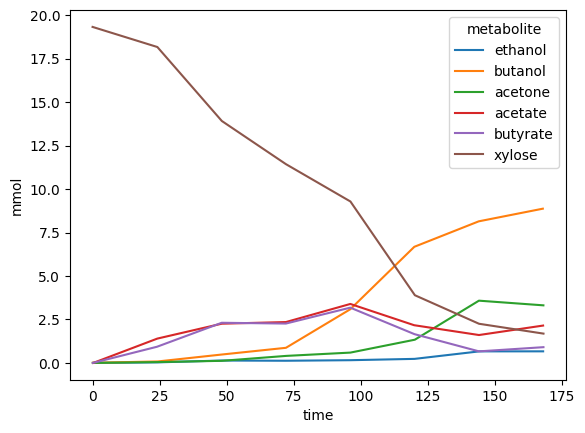

In [3]:
import seaborn as sns

sns.lineplot(data=nj4_data, x='time', y='mmol', hue='metabolite')

<AxesSubplot: xlabel='time', ylabel='g/L'>

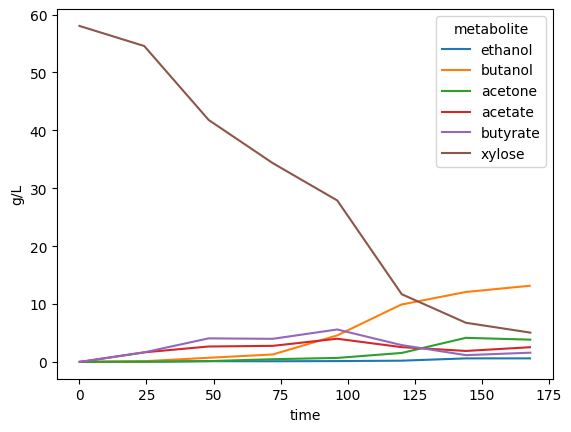

In [4]:
sns.lineplot(data=nj4_data, x='time', y='g/L', hue='metabolite')

<AxesSubplot: xlabel='time', ylabel='mmol'>

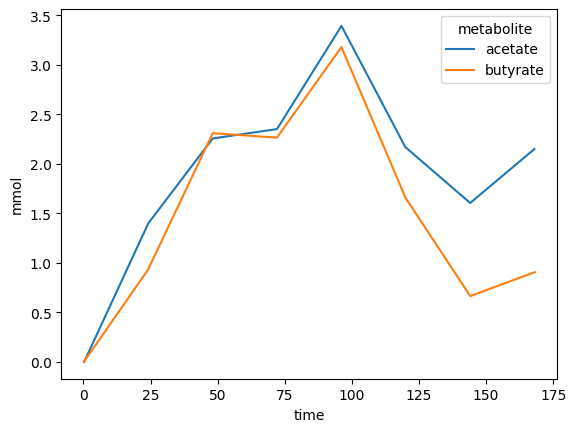

In [25]:
import seaborn as sns

sns.lineplot(data=nj4_data[(nj4_data["metabolite"]=="butyrate") | (nj4_data["metabolite"]=="acetate")], x='time', y='mmol', hue='metabolite')

The paper cites 72 hours as the time-point when solventogenesis is activated.

In [4]:
SOLVENTOGEN_A = 72

acido_data = nj4_data[nj4_data['time'] < 72]
solventogen_data = nj4_data[nj4_data['time'] >= 72]

ac = acido_data[acido_data["metabolite"] == "acetate"].sort_values(by="time").iloc[-1]["mmol"]
but = acido_data[acido_data["metabolite"] == "butyrate"].sort_values(by="time").iloc[-1]["mmol"]
xyl = acido_data[acido_data["metabolite"] == "xylose"].sort_values(by="time").iloc[-1]["mmol"]

ac_solventogen = solventogen_data[solventogen_data["metabolite"] == "acetate"].sort_values(by="time").iloc[-1]["mmol"]
but_solventogen = solventogen_data[solventogen_data["metabolite"] == "butyrate"].sort_values(by="time").iloc[-1]["mmol"]

acetone = solventogen_data[solventogen_data["metabolite"] == "acetone"].sort_values(by="time").iloc[-1]["mmol"]

ac_yield = ac/xyl
but_yield = but/xyl

In [36]:
print("Acetate yield during acidogenesis: ", ac_yield)
print("Butyrate yield during acidogenesis: ", but_yield)

Acetate yield during acidogenesis:  0.1621322999181244
Butyrate yield during acidogenesis:  0.1659515098891611


ratio of butyrate / acetate production duing the acidogenic phase

In [28]:
butyrate = acido_data[acido_data["metabolite"] == "butyrate"].sort_values(by="time").iloc[-1]["mmol"]
acetate = acido_data[acido_data["metabolite"] == "acetate"].sort_values(by="time").iloc[-1]["mmol"]

print(butyrate / acetate)

1.0235561326951224


ratio of butyrate / acetate consumption durig the solventogenic phase

In [29]:
butyrate = solventogen_data[solventogen_data["metabolite"] == "butyrate"].sort_values(by="time").iloc[-1]["mmol"]
acetate = solventogen_data[solventogen_data["metabolite"] == "acetate"].sort_values(by="time").iloc[-1]["mmol"]

print(butyrate / acetate)

0.42152778962446225


ratio of butanol / acetone production during the solventogenic phase

In [31]:
acetone = solventogen_data[solventogen_data["metabolite"] == "acetone"].sort_values(by="time").iloc[-1]["mmol"]
btoh = solventogen_data[solventogen_data["metabolite"] == "butanol"].sort_values(by="time").iloc[-1]["mmol"]

print(btoh / acetone)

2.6786624686734326


# Community time-course

In [1]:
import pandas as pd
from utils.unit_conversion import g_per_L_to_mmol

com_data = pd.read_csv('exp_data/community.csv')

In [5]:
from utils.data_processing import remove_neg_vals

remove_neg_vals(com_data, inplace=True)

# get row for mmol
com_data['mmol'] = com_data.apply(lambda row: g_per_L_to_mmol(row['metabolite'], row['g/L']), axis=1)

In [6]:
com_data.head()

,time,g/L,metabolite,mmol
0,6.394885e-14,0.113636,ethanol,0.123335
1,2.395556e+01,0.289893,ethanol,0.314636
2,4.993333e+01,0.579591,ethanol,0.629060
3,7.202222e+01,0.609924,ethanol,0.661982
4,9.597778e+01,0.737479,ethanol,0.800424


<AxesSubplot: xlabel='time', ylabel='g/L'>

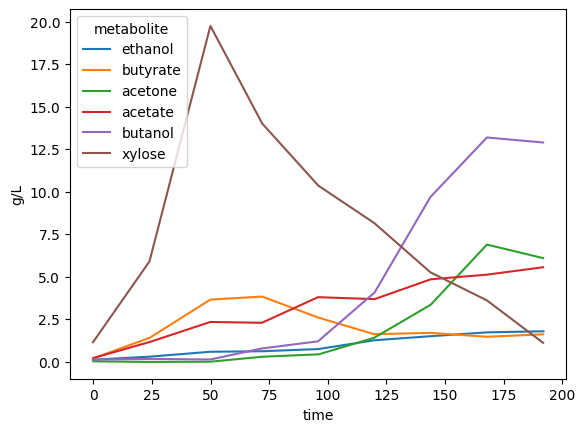

In [18]:
import seaborn as sns

sns.lineplot(data=com_data, x='time', y='g/L', hue='metabolite')

In [20]:
SOLVENTOGEN_A = 72

acido_data = com_data[com_data['time'] < 72]
solventogen_data = com_data[com_data['time'] >= 72]

ac = acido_data[acido_data["metabolite"] == "acetate"].sort_values(by="time").iloc[-1]["mmol"]
but = acido_data[acido_data["metabolite"] == "butyrate"].sort_values(by="time").iloc[-1]["mmol"]

ac_conc = acido_data[acido_data["metabolite"] == "acetate"].sort_values(by="time").iloc[-1]["g/L"]
but_conc = acido_data[acido_data["metabolite"] == "butyrate"].sort_values(by="time").iloc[-1]["g/L"]

In [21]:
print("ac:", ac, "mmol")
print("but:", but, "mmol")
print("total amount of acetate and butyrate:", ac + but, "mmol")

print("ac:", ac_conc, "g/L")
print("but:", but_conc, "g/L")

ac: 1.9324712032692526 mmol
but: 2.0700104224959497 mmol
total amount of acetate and butyrate: 4.002481625765203 mmol
ac: 2.2820165945165947 g/L
but: 3.6477723665223625 g/L
